In [0]:
# # The below are wrapper functions used to connect to your drive and this needs to be run once (i.e. once every new session or possibily refreshes for every 24 hours)

# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
# !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
# !apt-get update -qq 2>&1 > /dev/null
# !apt-get -y install -qq google-drive-ocamlfuse fuse

# # Authentication for your google drive
# from google.colab import auth
# auth.authenticate_user()
# from oauth2client.client import GoogleCredentials
# creds = GoogleCredentials.get_application_default()

# # Authentication for the wrapper libraries  or possibily refreshes for every 24 hours)

# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
# !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
# !apt-get update -qq 2>&1 > /dev/null
# !apt-get -y install -qq google-drive-ocamlfuse fuse


# import getpass
# !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
# vcode = getpass.getpass()
# !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpheut6x_i/pubring.gpg' created
gpg: /tmp/tmpheut6x_i/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
gpg: keybox '/tmp/tmp82pvan40/pubring.gpg' created
gpg: /tmp/tmp82pvan40/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [1]:
# !mkdir -p MyDrive
# !google-drive-ocamlfuse MyDrive
# # %cd ML/AIML_Labs/

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [2]:
%cd MyDrive/ML/AIML_Labs/FinalHackathon

/content/MyDrive/ML/AIML_Labs/FinalHackathon


In [0]:
# # http://pytorch.org/
# from os import path
# from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
# platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

# accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

# !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
# import torch

In [0]:
# Importing pytorch packages
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable

# Importing config.py file
# import config as cf
# from utils import *
## Importing python packages
import os
import sys
import time
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms

# import config as cf
from utils import *
from data_loader import *

# Importing pytorch packages
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
# Importing config.py file
import config as cf
from utils import *
# from light_cnn import network_9layers
from data_loader import *
## Importing python packages
import os
import sys
import time
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt



In [0]:
!ls

car_turns.ipynb  Data_Description.pdf  Lab11-Experiment2_2.ipynb  utils.py
config.py	 data_loader.py        signs_data


In [0]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
#         transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

NUM_CLASSES = 6

In [0]:
data_dir = 'signs_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
trainloader = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
use_cuda = torch.cuda.is_available()

In [31]:
for inputs, labels in trainloader['train']:
    print(type(inputs), type(labels), len(inputs), len(labels))

<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4

<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4 4
<class 'torch.FloatTensor'> <class 'torch.LongTensor'> 4

In [0]:
# image_datasets['train'].classes
# dir(dataloaders['train'])
class_names

['left', 'misc', 'right', 'signal', 'stop', 'u_turn']

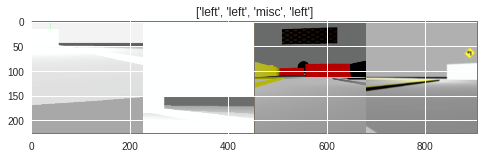

In [8]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [0]:
### Intiliazing the loss
criterion = nn.CrossEntropyLoss()

In [0]:
def train(epoch):
    print('\nEpoch: %d' % epoch)
    feature_net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        if use_cuda:
            inputs, targets = inputs.cuda(), targets.cuda()
        optimizer.zero_grad()
        inputs, targets = Variable(inputs), Variable(targets)
        outputs = feature_net(inputs)      ### notice that the pre-trained network has an implant classifier which directly outputs the 16 class prediction scores

        
        size_ = outputs.size()
        outputs_ = outputs.view(size_[0], num_classes)
        loss = criterion(outputs_, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.data[0]
        _, predicted = torch.max(outputs_.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
        
        if batch_idx%10 == 0 or batch_idx == len(trainloader)-1:
            progress_bar(batch_idx, len(trainloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                         % (train_loss/(batch_idx+1), 100.*correct/total, correct, total))
        
    train_loss_file.write('%d %.3f %.3f\n' %(epoch, train_loss/len(trainloader), 100.*correct/total))



In [0]:
def test(epoch):
    global best_acc
    feature_net.eval()
    test_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(testloader):
        if use_cuda:
            inputs, targets = inputs.cuda(), targets.cuda()
        inputs, targets = Variable(inputs, volatile=True), Variable(targets)
        outputs = feature_net(inputs)
        size_ = outputs.size()
        outputs_ = outputs.view(size_[0], num_classes)
        loss = criterion(outputs_, targets)

        test_loss += loss.data[0]
        _, predicted = torch.max(outputs_.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
        
        if batch_idx%10 == 0 or batch_idx == len(testloader)-1:
            progress_bar(batch_idx, len(testloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                         % (test_loss/(batch_idx+1), 100.*correct/total, correct, total))
        
    print('val_loss: ',  test_loss/len(testloader), 'accuracy: ', 100.0*correct/total)
    val_loss_file.write('%d %.3f %.3f\n' %(epoch,  test_loss/len(testloader), 100.*correct/total))

    # Save checkpoint.
    acc = 100.*correct/total
    if acc > best_acc:
        print('Saving..')
        state = {
            'net': classifier,
            'acc': acc,
            'epoch': epoch,
        }
        if not os.path.isdir(cf.data_dir+'checkpoint'):
            os.mkdir(cf.data_dir+'checkpoint')
        torch.save(state, cf.data_dir+'checkpoint/checkpoint_ckpt.t7')
        best_acc = acc
    
    return test_loss/len(testloader)

In [18]:
feature_net = models.resnet18(pretrained=True)
num_ftrs = feature_net.fc.in_features
feature_net.fc = nn.Linear(num_ftrs, NUM_CLASSES) 

# feature_net = feature_net.to(device)
if use_cuda:
    feature_net = feature_net.cuda()

# # Observe that all parameters are being optimized
# optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# # Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
    
    
    
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(feature_net.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)




### tweak only selected parts : FC1 and FC2. FC2 is 3 layer MLP.

# layers_to_finetune = [{'params': feature_net.fc1.parameters()},
#                       {'params':feature_net.fc2.parameters()}]

optimizer = optim.Adam(feature_net.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=2, verbose=True)   #### dynamic LR scheduler

for epoch in range(0, 30):
    train(epoch)
    test_loss = test(epoch)
    scheduler.step(test_loss)
    
train_loss_file.close()
val_loss_file.close()




Epoch: 0


ValueError: ignored

In [0]:
# feature_net = train_model(feature_net, criterion, optimizer_ft, exp_lr_scheduler,
#                        num_epochs=25)

Epoch 0/24
----------


AttributeError: ignored

In [0]:
visualize_model(model_ft)

0.3.1


In [0]:
torch.__version__

'0.3.0.post4'